<a href="https://colab.research.google.com/github/MariaNatiele/AprendizadoMaquina_Projetos/blob/main/Tree_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Bibliotecas
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [ ]:
iris = pd.read_csv('iris.csv')
iris.shape

(150, 5)

In [ ]:
iris.head(2)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [ ]:
#Tratamento de dados, caso necessite

iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [ ]:
iris.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [ ]:
#Separação da classe e dos previsores
previsores = iris.iloc[:,0:4].values
classe = iris.iloc[:,4].values

In [ ]:
#Transforma atributos categóricos em numéricos
transforme = LabelEncoder()
classe = transforme.fit_transform(classe)

In [ ]:
#Classe numérica
classe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Separação de treino e teste, separando 30% testes
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, classe, test_size=0.3,random_state=1)

In [ ]:
#Usando o modelo
arvore  = DecisionTreeClassifier()
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [ ]:
#Previsao
previsao = arvore.predict(x_teste)
previsao

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [ ]:
#Matriz de confusão
matriz = confusion_matrix(y_teste, previsao)
matriz

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

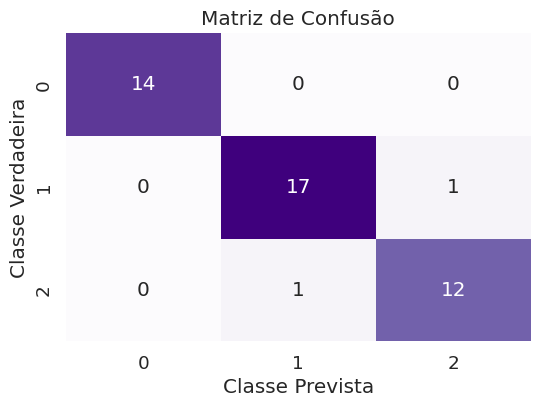

In [ ]:
#Plotagem da Matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['0', '1', '2'],
            yticklabels=['0', '1', '2'])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
#Acuracia
acuracia = accuracy_score(y_teste, previsao)
acuracia

0.9555555555555556

In [ ]:
#Nome das Classes
iris['class']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

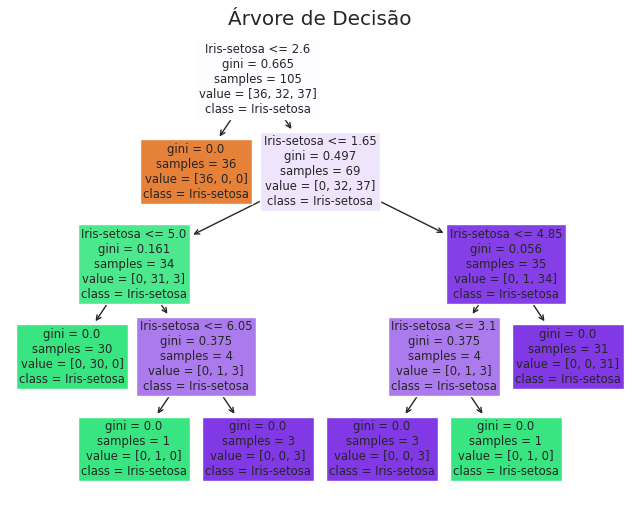

In [ ]:
#Arvore de decisão
plt.figure(figsize=(8,6))
plot_tree(arvore, filled=True, feature_names=iris['class'], class_names=iris['class'])
plt.title('Árvore de Decisão')
plt.show()